In [1]:
from cordra import CordraId, CordraClient, CordraObject, Dataset
from jsonschema import ValidationError
import json
from PIL import Image
from io import BytesIO
from requests import HTTPError

# CordraId

In [2]:
CordraId("hi", "world") in {"hi/world": 1}

True

# CordraObject

In [3]:
MyObject = type("MyObject", (CordraObject,), {})
MyObject._schema = {
    "type": "object",
    "required": ["id"],
    "properties": {
        "id": {
            "type": "string",
            "cordra":{"type":{"autoGeneratedField":"handle"}}
        },
        "_prefix": {"type": "string"}
    }
}
MyObject.update()

try:
    MyObject(properties={"a":{}, "_prefix":5}).__dict__
except ValidationError as e:
    print("success", e.args[0])
    
try:
    MyObject(properties={"id": "1", "a":{}, "_prefix":5}).__dict__
except ValidationError as e:
    print("success", e.args[0])

success 'id' is a required property
success 5 is not of type 'string'


In [4]:
obj1 = MyObject(properties={"id": "mathub:1", "hi":"world"})
obj2 = MyObject(properties={"id": "mathub:2", "goodbye":"rain"})

obj1.properties["related"] = obj2

print(obj1.json())

{"id": "mathub:1", "hi": "world", "related": "mathub:2"}


In [5]:
class Breaks:
    pass

obj1 = MyObject(properties={"id": "mathub:1", "hi":"world"})
obj2 = Breaks()

obj1.properties["related"] = obj2

json.loads(obj1.json())["related"] == None

True

In [6]:
from PIL import Image
from io import BytesIO

stream = BytesIO()
A = Image.radial_gradient("L").resize((32,32))
A.save(stream, format="PNG")

obj1 = CordraObject(properties={"hi":"world"}, payloads=[stream.getvalue()])

obj1.json()

'{"hi": "world"}'

In [7]:
obj1.payloads = stream.getvalue()

obj1.payloads

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x00\x00\x00\x00V\x11%(\x00\x00\x01\xf1IDATx\x9cE\x93Y\xaeD7\x08D\x19\n\xb8\xd9\xff^\xd3m38\x1f\xee\x9bg\xc9\x92\xa5:.\x90(\xf8\xbb\xbek\xad\xbd3\xab{\xe6\x10\x8b\x08\x007\x8f\x88\'\xb0\xd6\xf7\xbb\xd6\xde;\xabz\x86\x88D\x14\xb0\xf2\x9e9L\xf8~\xbf\x97\xc8\xac\xeb\xc0\xaa\x80y\xf5\x1c\xe2\x83\xf5\x12\x99U\xff\x03\xe6\xdds\x88\xe8`\xfd\x88kq\x86\xf8V\xa8>D\xc4\x82\xf5GT\xd5\x1cbQ\x98\xdd\xff,\x82\xbd\x7f\xc4\xde\xfb\x05\xcc|\xe6\x10\xb1\xa8b\xef\xbd\xd7\xdbF\xf70\xcbk\xc0\xa2P\xe4\xdek\xaf\xef\xf7\xb3\xd6\xca\xea!\x113\x9f!bU\x00\xc8\xcc\xdc{\xaf\xf5Ykg\x0f\x89\xc2\xfb\xd7kf\xa2*3s\xaf\xb5>ke\r1\xac\x87DTaY\x85\xae\xaa\xcc}\x89\x9ds\x14>$\xa2\xc8\xca\xaaBw\xd7e\xd6\xfa\xac\xdd\xa4\xd6$\x8a\xac\xaa\xeen\xcc\xcctUW\xe6^\x9f\x9d\x04\'A\xe6\x95g03sf\xba\xbbr\xef\xcf"?j\xd53W88t\xce\x9csff:\xd7\xbft\xd0\xdd33\xe7\x9cs\x8e\xd0=\xe7w\xe9\xfc=\x89\x88\x08L\xcc\xcc,"\xac\n?d\xa6"\xc2,\xcc\xcc\xcc\x10a\x16\x91\x9b\x12?8\x16fPU\x11\

In [8]:
obj1.somethingElse = 5
obj1.json()

'{"hi": "world"}'

# Dataset

In [9]:
host = "https://dev.materialhub.org/"
credentials_file = "~/my_cordra_login.json"

materialhub = CordraClient(host=host, credentials_file=credentials_file, verify=False)

dataset = Dataset(client=materialhub)

dataset.classes

{'ProcessProtocol': cordra.dataset.ProcessProtocol,
 'ProcessHistory': cordra.dataset.ProcessHistory,
 'MaterialPerformance': cordra.dataset.MaterialPerformance,
 'Material': cordra.dataset.Material,
 'Place': cordra.dataset.Place,
 'SoftwareApplication': cordra.dataset.SoftwareApplication,
 'Collection': cordra.dataset.Collection,
 'Citation': cordra.dataset.Citation,
 'Project': cordra.dataset.Project,
 'Action': cordra.dataset.Action,
 'Study': cordra.dataset.Study,
 'Dataset': cordra.dataset.Dataset,
 'MaterialProperty': cordra.dataset.MaterialProperty,
 'DefinedTermSet': cordra.dataset.DefinedTermSet,
 'Document': cordra.dataset.Document,
 'DefinedTerm': cordra.dataset.DefinedTerm,
 'MaterialStructure': cordra.dataset.MaterialStructure,
 'File': cordra.dataset.File,
 'Instrument': cordra.dataset.Instrument,
 'User': cordra.dataset.User,
 'Experiment': cordra.dataset.Experiment,
 'Group': cordra.dataset.Group,
 'Organization': cordra.dataset.Organization,
 'Person': cordra.dataset.

In [10]:
dataset.classes["Person"]._idString

'@id'

In [11]:
p1 = dataset.add('Person')

p1.get_id()

prefix/b29d2327-a460-4280-a73b-6ada0a88dc33

In [12]:
dataset.cordraObjects

{prefix/b29d2327-a460-4280-a73b-6ada0a88dc33: <cordra.dataset.Person at 0x7f576d1e4c40>}

In [13]:
dataset.deleteFromCordra(p1)

{}

In [14]:
p2 = dataset.add('Person', properties={"name": "testperson"})
p2.properties["address"] = "Main St"
dataset.sync()

try:
    p2_clone = dataset.pull(p2.get_id())
except KeyError:
    print(KeyError)

<class 'KeyError'>


In [15]:
dataset2 = Dataset(client=materialhub)
p2_clone = dataset2.pull(p2.get_id())

assert p2.properties == p2_clone.properties

dataset.deleteFromCordra(p2)

{}

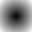

In [16]:
p3 = dataset.add('Person', properties={}, payloads={"img": stream.getvalue()})

p3_clone = dataset2.pull(p3.properties[p3._idString])
Image.open(BytesIO(p3.payloads['img']))

In [17]:
dataset.deleteFromCordra(p3)

{}

In [18]:
try:
    dataset.deleteFromCordra(p2_clone)
except HTTPError:
    print("It is important to note that duplicates may exist in other datasets!")

{'message': 'Missing object: prefix/0b48a8ed-69c4-473f-87c1-24a95a6acc67'}
It is important to note that duplicates may exist in other datasets!
